# PREDICTING COVID-19 DISEASE FROM SYMPTOMS USING ML

THIS NOTEBOOK USES VARIOUS PYTHON-BASED ML AND DATA SCIENCE LIBRARIES IN AN ATTEMPT TO BUILD A ML MODEL CAPABLE OF PREDICTING WHETHER OR NOT SOMEONE HAS COVID BASED ON THEIR MEDICAL ATTRIBUTES .

-------------------------------------------------------------------------------------------------------------------------------

#  Problem Statement
> Given clinical parameters about a patient , can we predict whether or not they have covid 19

# Data Availability
>All the data used in this study were retrieved from the Israeli Ministry of Health website11. The dataset was downloaded, translated into English, and can be accessed at: https://github.com/nshomron/covidpred/blob/master/data/corona_tested_individuals_ver_0083.english.csv.zip

>The original version of dataset was downloaded from https://data.gov.il/dataset/covid-19 on November 15, 2020 and translated into English

# Model Predictors/Features and Exact Variable Names (True = 1, False = 0)
1. Age over 60 - Age_60_and_above
2. Sex - (Male=1, Female=0)
3. Cough - Cough
4. Shortness of breath - Shortness_of_breath
5. Fever - Fever
6. Sore throat - Sore_throat
7. Headache - Headache
8. Contact with a confirmed individual - Contact_with_confirmed

-------------------------------------------------------------------------------------------------------------------------------

# Preparing the tools
We are going to use pandas , numpy , matplotlib and sklearn for data analysis and manipulation.

### Import all tools

In [1]:
# regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# managing data
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# models from sk-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model-evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,plot_roc_curve

# Loading Data

In [20]:
df=pd.read_csv("datasets/corona_tested_individuals_ver_0083.english.csv")
df

C:\Users\sunshine\Desktop\ml_and_data_sciene\sample\env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


# Setting up our required data

## Removing rows with missing and duplicate values 

In [21]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
5,2020-11-12,1,0,0,0,0,negative,No,male,Other
...,...,...,...,...,...,...,...,...,...,...
2731618,2020-03-20,0,0,0,0,0,negative,Yes,male,Contact with confirmed
2731620,2020-03-20,0,0,1,1,0,positive,No,female,Contact with confirmed
2731622,2020-03-20,1,0,0,1,0,positive,Yes,female,Contact with confirmed
2731634,2020-03-20,1,0,1,0,1,negative,No,female,Contact with confirmed


**<font color="green"> We observe that original data contained `2742596 rows × 10 columns` , but now after removing rows with missing or duplicate data , we are left with only `36734 rows × 10 columns`. </font>**

## Removing rows with corona_result=other

In [22]:
df["corona_result"].value_counts()

positive    19867
negative    13550
other        3317
Name: corona_result, dtype: int64

In [23]:
index_names=df[df["corona_result"]=="other"].index
df.drop(index_names,inplace=True)
df["corona_result"].value_counts()

positive    19867
negative    13550
Name: corona_result, dtype: int64

In [24]:
df.shape

(33417, 10)

**<font color="green"> Now , we are left with only `33417 rows × 10 columns`. </font>**

## Managing the types of data
We have to make sure that the data is numerical for better working of our model , so we will turn all categorical data into numerical columns .

In [26]:
df.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [27]:
dummies=pd.get_dummies(df[["test_indication"]])
dummies

,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
0,0,0,1
1,0,0,1
2,0,0,1
4,0,1,0
5,0,0,1
...,...,...,...
2731618,0,1,0
2731620,0,1,0
2731622,0,1,0
2731634,0,1,0


In [28]:
df["Contact_with_confirmed"]=dummies["test_indication_Contact with confirmed"]
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,Contact_with_confirmed
0,2020-11-12,0,0,0,0,0,negative,No,male,Other,0
1,2020-11-12,0,1,0,0,0,negative,No,male,Other,0
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other,0
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed,1
5,2020-11-12,1,0,0,0,0,negative,No,male,Other,0


In [29]:
le=LabelEncoder()
df["corona_result"]=le.fit_transform(df["corona_result"])
df["age_60_and_above"]=le.fit_transform(df["age_60_and_above"])
df["gender"]=le.fit_transform(df["gender"])
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,Contact_with_confirmed
0,2020-11-12,0,0,0,0,0,0,0,1,Other,0
1,2020-11-12,0,1,0,0,0,0,0,1,Other,0
2,2020-11-12,0,0,0,0,0,0,1,0,Other,0
4,2020-11-12,0,1,0,0,0,0,0,1,Contact with confirmed,1
5,2020-11-12,1,0,0,0,0,0,0,1,Other,0
...,...,...,...,...,...,...,...,...,...,...,...
2731618,2020-03-20,0,0,0,0,0,0,1,1,Contact with confirmed,1
2731620,2020-03-20,0,0,1,1,0,1,0,0,Contact with confirmed,1
2731622,2020-03-20,1,0,0,1,0,1,1,0,Contact with confirmed,1
2731634,2020-03-20,1,0,1,0,1,0,0,0,Contact with confirmed,1


## Removing unwanted columns
There are some columns in our data which we doesn't require in our model like test_date and test_indication . So we are going to remove them .


In [30]:
df.drop(["test_date","test_indication"],axis=1,inplace=True)
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Contact_with_confirmed
0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,1
5,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
2731618,0,0,0,0,0,0,1,1,1
2731620,0,0,1,1,0,1,0,0,1
2731622,1,0,0,1,0,1,1,0,1
2731634,1,0,1,0,1,0,0,0,1


# Final DataFrame

In [31]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Contact_with_confirmed
0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,1
5,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
2731618,0,0,0,0,0,0,1,1,1
2731620,0,0,1,1,0,1,0,0,1
2731622,1,0,0,1,0,1,1,0,1
2731634,1,0,1,0,1,0,0,0,1


# Data exploration or EDA ( Exploratory Data Analysis )

### Frequency Analysis of different features

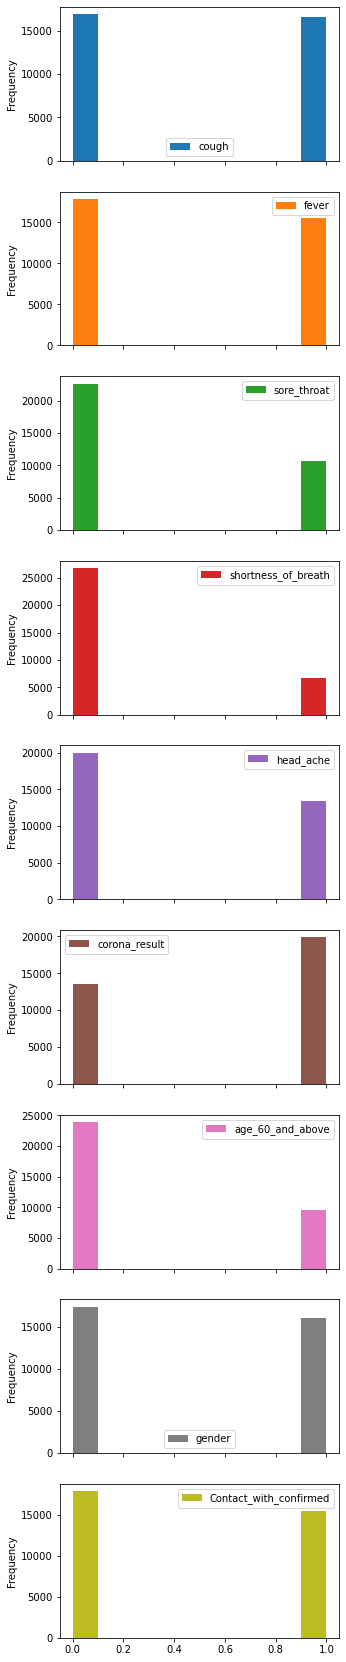

In [13]:
df.plot.hist(subplots=True,figsize=(5,30));

### Corona Result Column Analysis
We are going to analyse the different aspects of the target column i.e. corona_resut

In [35]:
df["corona_result"].value_counts()

1    19867
0    13550
Name: corona_result, dtype: int64

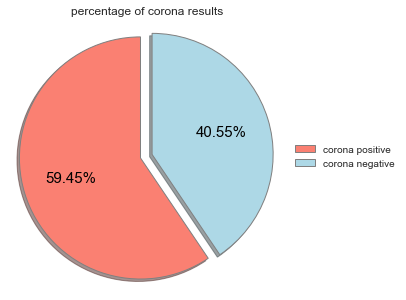

In [163]:
# df["corona_result"].value_counts().plot(kind="pie",
#                                         xlabel="corona result (1=positive , 0=negative)",ylabel="no. of patients"
#                                         );

# plt.pie(df.corona_result.value_counts(),labels=True,autopct="1.2f%%");
fig,ax=plt.subplots(figsize=(5,5))
wedges,texts,autotexts=ax.pie(df["corona_result"].value_counts(),
       explode=(0,0.1),shadow=True,startangle=90,
       autopct="%1.2f%%",
       colors=["salmon","lightblue"],
       wedgeprops={"linewidth":1,"edgecolor":"gray"},
       textprops={"color":"black","size":15}
       )
ax.axis("equal")
ax.legend(wedges,["corona positive","corona negative"],loc="center left",bbox_to_anchor=(1,0,0.5,1))
ax.set_title("percentage of corona results")
plt.show();

**<font color="green">We observe that we have more entries for corona positive cases(19867) than corona negative cases (13550)</font>**

### Corona Result vs Other Columns

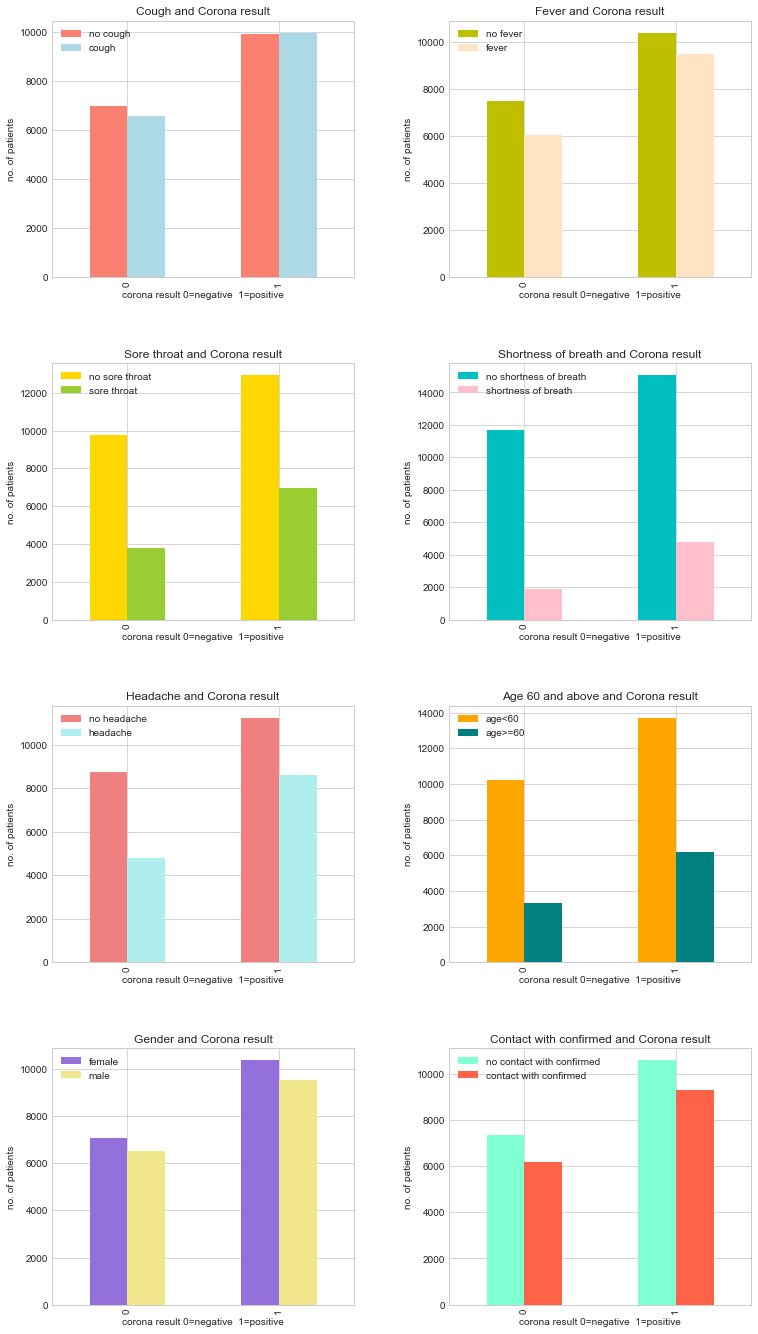

In [119]:
plt.style.use("seaborn-whitegrid")
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(12,20))
fig.tight_layout(pad=7.0)

pd.crosstab(df["corona_result"],df["cough"]).plot(kind="bar",color=["salmon","lightblue"],
                                                  ax=ax[0][0],
                                                  title="Cough and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[0][0].legend(["no cough","cough"])

pd.crosstab(df["corona_result"],df["fever"]).plot(kind="bar",color=["y","bisque"],
                                                  ax=ax[0][1],
                                                  title="Fever and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[0][1].legend(["no fever","fever"])

pd.crosstab(df["corona_result"],df["sore_throat"]).plot(kind="bar",color=["gold","yellowgreen"],
                                                  ax=ax[1][0],
                                                  title="Sore throat and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[1][0].legend(["no sore throat","sore throat"])

pd.crosstab(df["corona_result"],df["shortness_of_breath"]).plot(kind="bar",color=["c","pink"],
                                                  ax=ax[1][1],
                                                  title="Shortness of breath and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[1][1].legend(["no shortness of breath","shortness of breath"])

pd.crosstab(df["corona_result"],df["head_ache"]).plot(kind="bar",color=["lightcoral","paleturquoise"],
                                                  ax=ax[2][0],
                                                  title="Headache and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[2][0].legend(["no headache","headache"])

pd.crosstab(df["corona_result"],df["age_60_and_above"]).plot(kind="bar",color=["orange","teal"],
                                                  ax=ax[2][1],
                                                  title="Age 60 and above and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[2][1].legend(["age<60","age>=60"])

pd.crosstab(df["corona_result"],df["gender"]).plot(kind="bar",color=["mediumpurple","khaki"],
                                                  ax=ax[3][0],
                                                  title="Gender and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[3][0].legend(["female","male"])

pd.crosstab(df["corona_result"],df["Contact_with_confirmed"]).plot(kind="bar",color=["aquamarine","tomato"],
                                                  ax=ax[3][1],
                                                  title="Contact with confirmed and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[3][1].legend(["no contact with confirmed","contact with confirmed"]);